In [1]:
import json
import random

import cv2
import matplotlib.pyplot as plt

In [2]:
def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path

def get_annotations(json_file, image_num):
    anns = [ann for ann in json_file['annotations'] if ann['image_id'] == image_num]
    return anns

def get_categories(json_file):
    categories = dict()
    class_num = len(json_file['categories'])
    for index in range(class_num):
        categories[index] = json_file['categories'][index]['name']
    return categories

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def plot_bbox(image, anns):
    for ann in anns:
        xmin, ymin, w, h = map(int, ann['bbox'])
        image = cv2.rectangle(image, (xmin, ymin), (xmin + w, ymin + h), (0, 0, 255), 3)
        image = cv2.putText(image, categories[ann['category_id']], (xmin+2, ymin + h-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2, cv2.LINE_AA)
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.imshow(image)

In [3]:
with open('./detection/dataset/train.json', 'r') as f:
    train_json = json.load(f)

dataset_path = './detection/dataset/'

In [4]:
ImageIndex = 0

Class = ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
ImageNo = 56, ImageName = train/0056.jpg


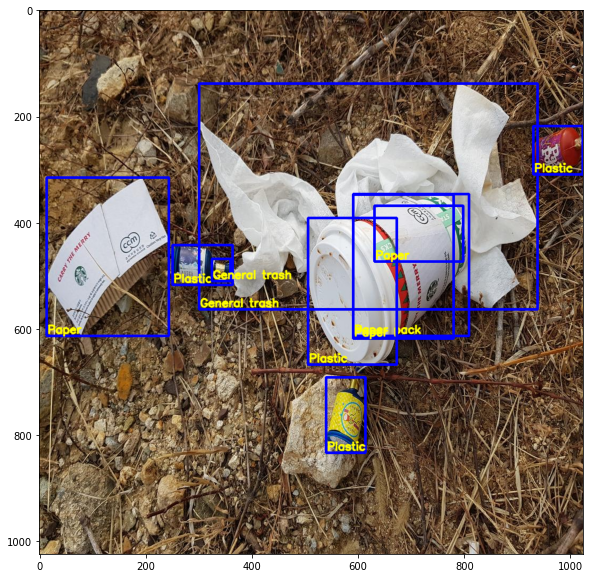

In [61]:
# image_num = random.randint(0, len(train_json['images']) - 1)
image_num = ImageIndex
file_path = get_file_path(train_json, image_num)
categories = get_categories(train_json)
anns = get_annotations(train_json, image_num)
image = read_image(dataset_path, file_path)
print(f"Class = {list(categories.values())}")
print(f"ImageNo = {ImageIndex}, ImageName = {file_path}")
plot_bbox(image, anns)
ImageIndex += 1